In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import string 
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support as score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# IMPORTING DATA

In [2]:
data=pd.read_csv('movie_data.csv')
print(data.head())
print(data.shape)

                                              review  sentiment
0  In 1974, the teenager Martha Moxley (Maggie Gr...          1
1  OK... so... I really like Kris Kristofferson a...          0
2  ***SPOILER*** Do not read this, if you think a...          0
3  hi for all the people who have seen this wonde...          1
4  I recently bought the DVD, forgetting just how...          0
(50000, 2)


# CLEANING

In [3]:
#Removing punctuations from entire dataset
punc_set = string.punctuation
punc_set

#Function for removing punctions
def remove_punc(text):
    clean = "".join([x.lower() for x in text if x not in punc_set])
    return clean

#Applying the 'remove_punc' function to entire dataset
data['no_punc'] = data['review'].apply(lambda z:remove_punc(z))

#Function for Tokenizing entire data for representing every word as datapoint
def tokenize(text):
    tokens = re.split("\W+",text)
    return tokens

#Applying the 'tokenize' function to entire dataset
data['tokenized_Data'] = data['no_punc'].apply(lambda z:tokenize(z))

#Importing stopwords from NLTK Library to remove stopwords now that we have tokenized it
stopwords = nltk.corpus.stopwords.words('english')

#Function for removing stopwords from single row
def remove_stopwords(tokenized_words):
    Ligit_text=[word for word in tokenized_words if word not in stopwords]
    return Ligit_text

#Applying the function 'remove_stopwords' from the entire dataset
data["no_stop"] = data["tokenized_Data"].apply(lambda z:remove_stopwords(z))

#Importing 'WordNetLemmatizer' as lemmatizing function to find lemma's of words
wnl = nltk.wordnet.WordNetLemmatizer()

#Function for lemmatizing the tokenzied text
def lemmatizing(tokenized_text):
    lemma = [wnl.lemmatize(word) for word in tokenized_text]
    return lemma

#Applying the 'lemmatizing' function to entire dataset     
data['lemmatized'] = data['no_stop'].apply(lambda z:lemmatizing(z))

# #Importing the 'SnowballStemmer' and declaring variable 'sno' to save the stemmer in.
# #This Stemmer gives slightly better results as compared to 'PorterStemmer'
# sno = nltk.SnowballStemmer('english')

# #Function for applying stemming to find stem roots of all words
# def stemming(tokenized_text):
#     text= [sno.stem(word) for word in tokenized_text]
#     return text

# #Applying the 'stemming' function to entire dataset
# data['ss_stemmed'] = data['lemmatized'].apply(lambda z:stemming(z))


# ps = nltk.PorterStemmer()

# def stemming(tokenized_text):
#     text= [ps.stem(word) for word in tokenized_text]
#     return text

# data['ps_stemmed'] = data['lemmatized'].apply(lambda z:stemming(z))

#This step is done here because, the 'lemmatized' column is a list of tokenized words and when we apply vectorization
#techniques such as count vectorizer or TFIDF, they require string input. Hence convert all tokenzied words to string
data['lemmatized'] = [" ".join(review) for review in data['lemmatized'].values]

data.head()

,review,sentiment,no_punc,tokenized_Data,no_stop,lemmatized
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1,in 1974 the teenager martha moxley maggie grac...,"[in, 1974, the, teenager, martha, moxley, magg...","[1974, teenager, martha, moxley, maggie, grace...",1974 teenager martha moxley maggie grace move ...
1,OK... so... I really like Kris Kristofferson a...,0,ok so i really like kris kristofferson and his...,"[ok, so, i, really, like, kris, kristofferson,...","[ok, really, like, kris, kristofferson, usual,...",ok really like kris kristofferson usual easy g...
2,"***SPOILER*** Do not read this, if you think a...",0,spoiler do not read this if you think about wa...,"[spoiler, do, not, read, this, if, you, think,...","[spoiler, read, think, watching, movie, althou...",spoiler read think watching movie although wou...
3,hi for all the people who have seen this wonde...,1,hi for all the people who have seen this wonde...,"[hi, for, all, the, people, who, have, seen, t...","[hi, people, seen, wonderful, movie, im, sure,...",hi people seen wonderful movie im sure thet wo...
4,"I recently bought the DVD, forgetting just how...",0,i recently bought the dvd forgetting just how ...,"[i, recently, bought, the, dvd, forgetting, ju...","[recently, bought, dvd, forgetting, much, hate...",recently bought dvd forgetting much hated movi...


In [4]:
#Splitting data into smaller dataframes for the purpose of Training and Testing
x1 = data.iloc[:25000,5]
x2 = data.iloc[25000:50000,5]
y1 = data.iloc[:25000,1]
y2 = data.iloc[25000:50000,1]
print(x1.shape)
print(x2.shape)
print(y1.shape)
print(y2.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [5]:
count_vect = CountVectorizer()
c_train = count_vect.fit_transform(x1.values)
c_test = count_vect.transform(x2.values)
print(c_train.shape)
print(c_test.shape)

(25000, 113901)
(25000, 113901)


In [6]:
#Declaring and applying TFIDF functions to train and test data
tfidf_vect = TfidfVectorizer(ngram_range=(1,2))
tfidf_train = tfidf_vect.fit_transform(x1.values)
tfidf_test=tfidf_vect.transform(x2.values)
print(tfidf_train.shape)
print(tfidf_test.shape)

(25000, 1849725)
(25000, 1849725)


# MODEL 1: Naive Bayes

BERNOULLI NAIVE BAYES

Alpha = 0 

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Test_accuracy 77.088
Train_accuracy 97.732
precision:[0.7685017  0.77332037], reccall:[0.77672228 0.76501243], accuracy:0.77088, fscore[0.77259012 0.76914396]


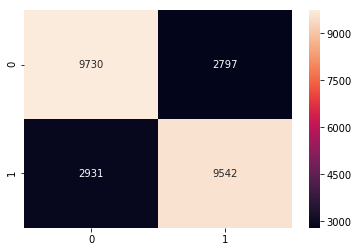

In [7]:
clf = BernoulliNB(alpha=0)
clf.fit(c_train,y1)

y_pred_test = clf.predict(c_test)

test_acc = accuracy_score(y2, clf.predict(c_test), normalize=True)*float(100)
print('Test_accuracy',(test_acc))

train_acc = accuracy_score(y1,clf.predict(c_train),normalize=True)*float(100)
print('Train_accuracy',(train_acc))

sns.heatmap(confusion_matrix(y2,y_pred_test),annot=True,fmt='d')

precision, recall, fscore, support= score(y2,y_pred_test)

print("precision:{}, reccall:{}, accuracy:{}, fscore{}".format(precision,recall,(y_pred_test==y2).sum()/len(y_pred_test),fscore))

Alpha = 0.7 (Also the best)

Test_accuracy 85.488
Train_accuracy 93.0
precision:[0.8348258  0.87763641], reccall:[0.88560709 0.82401988], accuracy:0.85488, fscore[0.859467   0.84998346]


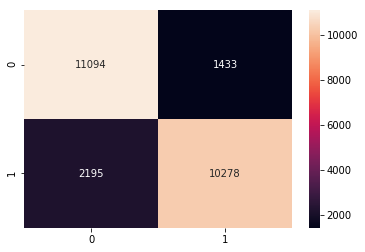

In [8]:
clf = BernoulliNB(alpha=0.7)
clf.fit(c_train,y1)

y_pred_test = clf.predict(c_test)

test_acc = accuracy_score(y2, clf.predict(c_test), normalize=True)*float(100)
print('Test_accuracy',(test_acc))

train_acc = accuracy_score(y1,clf.predict(c_train),normalize=True)*float(100)
print('Train_accuracy',(train_acc))

sns.heatmap(confusion_matrix(y2,y_pred_test),annot=True,fmt='d')

precision, recall, fscore, support= score(y2,y_pred_test)

print("precision:{}, reccall:{}, accuracy:{}, fscore{}".format(precision,recall,(y_pred_test==y2).sum()/len(y_pred_test),fscore))

Alpha = 5

Test_accuracy 85.264
Train_accuracy 89.336
precision:[0.82696147 0.88289623], reccall:[0.89271174 0.81239477], accuracy:0.85264, fscore[0.85857965 0.84617954]


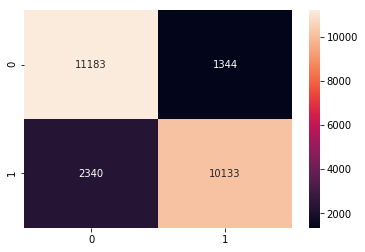

In [9]:
clf = BernoulliNB(alpha=5)
clf.fit(c_train,y1)

y_pred_test = clf.predict(c_test)

test_acc = accuracy_score(y2, clf.predict(c_test), normalize=True)*float(100)
print('Test_accuracy',(test_acc))

train_acc = accuracy_score(y1,clf.predict(c_train),normalize=True)*float(100)
print('Train_accuracy',(train_acc))

sns.heatmap(confusion_matrix(y2,y_pred_test),annot=True,fmt='d')

precision, recall, fscore, support= score(y2,y_pred_test)

print("precision:{}, reccall:{}, accuracy:{}, fscore{}".format(precision,recall,(y_pred_test==y2).sum()/len(y_pred_test),fscore))

MULTINOMIAL NAIVE BAYES

Alpha = 0

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Test_accuracy 77.82
Train_accuracy 97.74000000000001
precision:[0.77715148 0.77926475], reccall:[0.78143211 0.7749539 ], accuracy:0.7782, fscore[0.77928591 0.77710335]


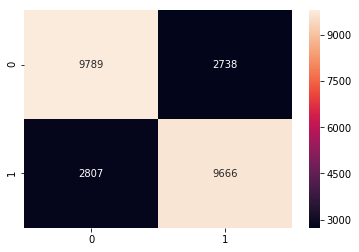

In [10]:
clf = MultinomialNB(alpha=0)
clf.fit(c_train,y1)

y_pred_test = clf.predict(c_test)

test_acc = accuracy_score(y2, clf.predict(c_test), normalize=True)*float(100)
print('Test_accuracy',(test_acc))

train_acc = accuracy_score(y1,clf.predict(c_train),normalize=True)*float(100)
print('Train_accuracy',(train_acc))

sns.heatmap(confusion_matrix(y2,y_pred_test),annot=True,fmt='d')

precision, recall, fscore, support= score(y2,y_pred_test)

print("precision:{}, reccall:{}, accuracy:{}, fscore{}".format(precision,recall,(y_pred_test==y2).sum()/len(y_pred_test),fscore))

Alpha = 1.6 (Also the best)

Test_accuracy 85.63199999999999
Train_accuracy 91.432
precision:[0.84022542 0.87412587], reccall:[0.88073761 0.83179668], accuracy:0.85632, fscore[0.86000468 0.85243612]


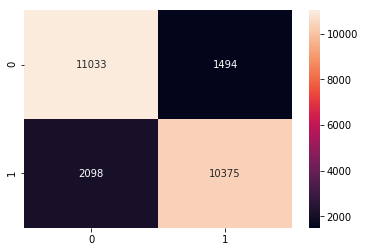

In [11]:
nb_clf = MultinomialNB(alpha=1.6)
nb_clf.fit(c_train,y1)

y_pred_test = nb_clf.predict(c_test)

test_acc = accuracy_score(y2, nb_clf.predict(c_test), normalize=True)*float(100)
print('Test_accuracy',(test_acc))
train_acc = accuracy_score(y1,nb_clf.predict(c_train),normalize=True)*float(100)
print('Train_accuracy',(train_acc))

precision, recall, fscore, support= score(y2,y_pred_test)
print("precision:{}, reccall:{}, accuracy:{}, fscore{}".format(precision,recall,(y_pred_test==y2).sum()/len(y_pred_test),fscore))

sns.heatmap(confusion_matrix(y2,y_pred_test),annot=True,fmt='d')

Alpha = 2

Test_accuracy 85.6
Train_accuracy 91.08000000000001
precision:[0.83971383 0.87404097], reccall:[0.88073761 0.8311553 ], accuracy:0.856, fscore[0.85973662 0.85205885]


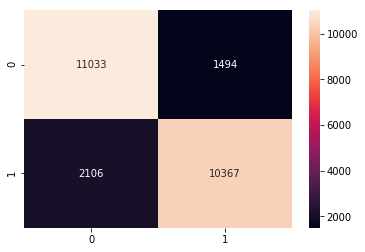

In [12]:
clf = MultinomialNB(alpha=2)
clf.fit(c_train,y1)

y_pred_test = clf.predict(c_test)

test_acc = accuracy_score(y2, clf.predict(c_test), normalize=True)*float(100)
print('Test_accuracy',(test_acc))

train_acc = accuracy_score(y1,clf.predict(c_train),normalize=True)*float(100)
print('Train_accuracy',(train_acc))

sns.heatmap(confusion_matrix(y2,y_pred_test),annot=True,fmt='d')

precision, recall, fscore, support= score(y2,y_pred_test)

print("precision:{}, reccall:{}, accuracy:{}, fscore{}".format(precision,recall,(y_pred_test==y2).sum()/len(y_pred_test),fscore))

BERNOULLI + TF-IDF

TfIdf Test Accuracy =  87.832
TfIdf Train Accuracy =  98.532
precision:[0.83971383 0.87404097], reccall:[0.88073761 0.8311553 ], accuracy:0.856, fscore[0.85973662 0.85205885]


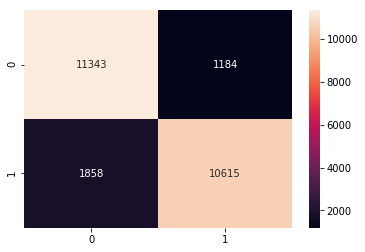

In [13]:
#Applying Function MULTINOMIAL NAIVE BAYES and checking accuracy scores and F-Scores
nb_clf = BernoulliNB(alpha=5)
nb_clf.fit(tfidf_train,y1)

y_pred_tfidf_test = nb_clf.predict(tfidf_test)

tfidf_test_acc = accuracy_score(y2,nb_clf.predict(tfidf_test),normalize=True)*float(100)
print('TfIdf Test Accuracy = ',(tfidf_test_acc))

tfidf_train_acc = accuracy_score(y1,nb_clf.predict(tfidf_train),normalize=True)*float(100)
print('TfIdf Train Accuracy = ',(tfidf_train_acc))

sns.heatmap(confusion_matrix(y2,y_pred_tfidf_test),annot=True,fmt='d')

precision, recall, fscore, support= score(y2,y_pred_test)

print("precision:{}, reccall:{}, accuracy:{}, fscore{}".format(precision,recall,(y_pred_test==y2).sum()/len(y_pred_test),fscore))

 MULTINOMIAL + TF-IDF

Alpha = 2 (Also the best)

TfIdf Test Accuracy =  87.988
TfIdf Train Accuracy =  97.528
precision:[0.83971383 0.87404097], reccall:[0.88073761 0.8311553 ], accuracy:0.856, fscore[0.85973662 0.85205885]


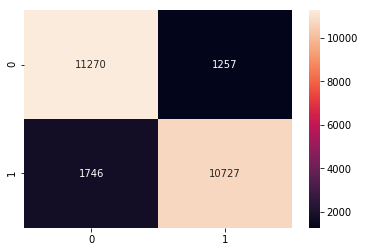

In [14]:
#Applying Function MULTINOMIAL NAIVE BAYES and checking accuracy scores and F-Scores
nb_clf = MultinomialNB(alpha=2)
nb_clf.fit(tfidf_train,y1)

y_pred_tfidf_test = nb_clf.predict(tfidf_test)

tfidf_test_acc = accuracy_score(y2,nb_clf.predict(tfidf_test),normalize=True)*float(100)
print('TfIdf Test Accuracy = ',(tfidf_test_acc))

tfidf_train_acc = accuracy_score(y1,nb_clf.predict(tfidf_train),normalize=True)*float(100)
print('TfIdf Train Accuracy = ',(tfidf_train_acc))

sns.heatmap(confusion_matrix(y2,y_pred_tfidf_test),annot=True,fmt='d')

precision, recall, fscore, support= score(y2,y_pred_test)

print("precision:{}, reccall:{}, accuracy:{}, fscore{}".format(precision,recall,(y_pred_test==y2).sum()/len(y_pred_test),fscore))

Alpha = 0.3

TfIdf Test Accuracy =  88.228
TfIdf Train Accuracy =  99.996
precision:[0.83971383 0.87404097], reccall:[0.88073761 0.8311553 ], accuracy:0.856, fscore[0.85973662 0.85205885]


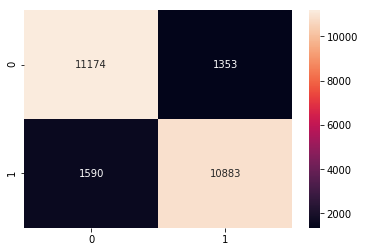

In [15]:
#Applying Function MULTINOMIAL NAIVE BAYES and checking accuracy scores and F-Scores
clf = MultinomialNB(alpha=0.03)
clf.fit(tfidf_train,y1)

y_pred_tfidf_test = clf.predict(tfidf_test)

tfidf_test_acc = accuracy_score(y2,clf.predict(tfidf_test),normalize=True)*float(100)
print('TfIdf Test Accuracy = ',(tfidf_test_acc))

tfidf_train_acc = accuracy_score(y1,clf.predict(tfidf_train),normalize=True)*float(100)
print('TfIdf Train Accuracy = ',(tfidf_train_acc))

sns.heatmap(confusion_matrix(y2,y_pred_tfidf_test),annot=True,fmt='d')

precision, recall, fscore, support= score(y2,y_pred_test)

print("precision:{}, reccall:{}, accuracy:{}, fscore{}".format(precision,recall,(y_pred_test==y2).sum()/len(y_pred_test),fscore))

# MODEL 2: LOGISTIC REGRESSION

In [16]:
tfidf_vect = TfidfVectorizer()
x_tfidf = tfidf_vect.fit_transform(data["lemmatized"])

x_train, x_test, y_train, y_test = train_test_split(x_tfidf,data["sentiment"],test_size=0.5)

log = LogisticRegression(penalty='l2',random_state=0, solver='lbfgs', multi_class='auto', max_iter=500)
log.fit(x_train,y_train)
y_prediction = log.predict(x_test)
f1 = f1_score(y_prediction,y_test)
print('F1 score',f1*100)

F1 score 89.00296150049358


In [17]:
count_vect1 = CountVectorizer()
x_cvect1 = count_vect1.fit_transform(data["lemmatized"])

cx_train, cx_test, cy_train, cy_test = train_test_split(x_cvect1,data["sentiment"],test_size=0.5)

log = LogisticRegression(penalty='l2',random_state=0, solver='lbfgs', multi_class='auto', max_iter=500)
log.fit(cx_train,cy_train)
cy_prediction = log.predict(cx_test)
f1 = f1_score(cy_prediction,cy_test)
print('F1 score',f1*100)

F1 score 88.31343934647262


# MODEL 3: SVM CLASSIFIER

TF-IDF + SVM: LINEAR

In [18]:
tfidf_vect = TfidfVectorizer()
x_tfidf = tfidf_vect.fit_transform(data["lemmatized"])

x_train, x_test, y_train, y_test = train_test_split(x_tfidf,data["sentiment"],test_size=0.5)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

svm = SVC(kernel = 'linear',random_state=0, C = 1.0, verbose=True)
svm.fit(x_train,y_train)

print(svm.score(x_train,y_train))
print(svm.score(x_test, y_test))

(25000, 169078)
(25000,)
(25000,)
(25000, 169078)
[LibSVM]0.9686
0.8946


BOG + SVM: LINEAR

In [19]:
count_vect1 = CountVectorizer()
x_cvect1 = count_vect1.fit_transform(data["lemmatized"])

x_train, x_test, y_train, y_test = train_test_split(x_cvect1,data["sentiment"],test_size=0.5)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

svm = SVC(kernel = 'linear',random_state=0, C = 1.0, verbose=True)
svm.fit(x_train,y_train)

print(svm.score(x_train,y_train))
print(svm.score(x_test, y_test))

(25000, 169078)
(25000,)
(25000,)
(25000, 169078)
[LibSVM]0.99996
0.8634


TF-IDF + SVM: 'RBF'

In [20]:
tfidf_vect = TfidfVectorizer()
x_tfidf = tfidf_vect.fit_transform(data["lemmatized"])

x_train, x_test, y_train, y_test = train_test_split(x_tfidf,data["sentiment"],test_size=0.5)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

svm = SVC(kernel = 'rbf',random_state=0, C = 1.0, verbose=True)
svm.fit(x_train,y_train)

print(svm.score(x_train,y_train))
print(svm.score(x_test, y_test))

(25000, 169078)
(25000,)
(25000,)
(25000, 169078)
[LibSVM]

C:\Users\rpatil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5018
0.4982


BOG + SVM: 'RBF'

In [21]:
count_vect1 = CountVectorizer()
x_cvect1 = count_vect1.fit_transform(data["lemmatized"])

x_train, x_test, y_train, y_test = train_test_split(x_cvect1,data["sentiment"],test_size=0.5)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

svm = SVC(kernel = 'rbf',random_state=0, C = 1.0, verbose=True)
svm.fit(x_train,y_train)

print(svm.score(x_train,y_train))
print(svm.score(x_test, y_test))

(25000, 169078)
(25000,)
(25000,)
(25000, 169078)
[LibSVM]0.545
0.54352


TF-IDF + SVM: 'Poly, Degree = 3'

In [22]:
tfidf_vect = TfidfVectorizer()
x_tfidf = tfidf_vect.fit_transform(data["lemmatized"])

x_train, x_test, y_train, y_test = train_test_split(x_tfidf,data["sentiment"],test_size=0.5)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

svm = SVC(kernel = 'poly',degree = 3,random_state=0, C = 1.0, verbose=True)
svm.fit(x_train,y_train)

print(svm.score(x_train,y_train))
print(svm.score(x_test, y_test))

(25000, 169078)
(25000,)
(25000,)
(25000, 169078)
[LibSVM]0.50012
0.49988


BOG + SVM: 'Poly, Degree = 3'

In [23]:
count_vect1 = CountVectorizer()
x_cvect1 = count_vect1.fit_transform(data["lemmatized"])

x_train, x_test, y_train, y_test = train_test_split(x_cvect1,data["sentiment"],test_size=0.5)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

svm = SVC(kernel = 'poly',degree = 3,random_state=0, C = 1.0, verbose=True)
svm.fit(x_train,y_train)

print(svm.score(x_train,y_train))
print(svm.score(x_test, y_test))

(25000, 169078)
(25000,)
(25000,)
(25000, 169078)
[LibSVM]0.50164
0.49836


TF-IDF + SVM: 'SIGMOID'

In [24]:
tfidf_vect = TfidfVectorizer()
x_tfidf = tfidf_vect.fit_transform(data["lemmatized"])

x_train, x_test, y_train, y_test = train_test_split(x_tfidf,data["sentiment"],test_size=0.5)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

svm = SVC(kernel = 'sigmoid',random_state=0, C = 1.0, verbose=True)
svm.fit(x_train,y_train)

print(svm.score(x_train,y_train))
print(svm.score(x_test, y_test))

(25000, 169078)
(25000,)
(25000,)
(25000, 169078)
[LibSVM]0.50236
0.49764


BOG + SVM: 'SIGMOID'

In [25]:
count_vect1 = CountVectorizer()
x_cvect1 = count_vect1.fit_transform(data["lemmatized"])

x_train, x_test, y_train, y_test = train_test_split(x_cvect1,data["sentiment"],test_size=0.5)

print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

svm = SVC(kernel = 'sigmoid',random_state=0, C = 1.0, verbose=True)
svm.fit(x_train,y_train)

print(svm.score(x_train,y_train))
print(svm.score(x_test, y_test))

(25000, 169078)
(25000,)
(25000,)
(25000, 169078)
[LibSVM]0.50376
0.4996


# MODEL #4: TF-IDF + RANDOM FOREST

In [26]:
tfidf_vect = TfidfVectorizer()
x_tfidf = tfidf_vect.fit_transform(data["lemmatized"])

# print (tfidf_vect.get_feature_names())

In [27]:
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)

print(cross_val_score (rf , x_tfidf, data["sentiment"], cv = k_fold, scoring='accuracy',n_jobs=-1))

x_train, x_test, y_train, y_test = train_test_split(x_tfidf,data["sentiment"],test_size=0.5)

print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

rf = RandomForestClassifier(n_estimators=50,max_depth=20)
rf_model = rf.fit(x_train,y_train)

y_pred = rf_model.predict(x_test)

precision, recall, fscore, support= score(y_test,y_pred)

print("precision:{}, recall:{}, accuracy:{}".format(precision,recall,(y_pred==y_test).sum()/len(y_pred)))

print("precision:{}, reccall:{}, accuracy:{}, fscore{}".format(precision,recall,(y_pred==y_test).sum()/len(y_pred),fscore))

[0.7523 0.764  0.7621 0.7581 0.7596]
(25000, 169078)
(25000,)
(25000,)
(25000, 169078)
precision:[0.84078947 0.785     ], recall:[0.7662483  0.85469538], accuracy:0.81044
precision:[0.84078947 0.785     ], reccall:[0.7662483  0.85469538], accuracy:0.81044, fscore[0.80179012 0.81836649]


In [28]:
param = {'n_estimators':[10,150,300], 
         'max_depth':[30,60,90,None]}


gs = GridSearchCV(rf , param, cv = 5 , n_jobs=-1)
gs_fit = gs.fit(x_tfidf,data['sentiment'])

KeyboardInterrupt: 

In [ ]:
# pd.DataFrame(gs_fit.cv_results_).sort_values("mean_test_score",ascending=False)[0:5]

COUNT VECTORIZER + RANDOM FOREST

In [29]:
count_vect = CountVectorizer()
x_count =  count_vect.fit_transform(data["lemmatized"])

# print(x_count.shape)
# count_vect.get_feature_names()

In [30]:
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)

print(cross_val_score (rf , x_count, data["sentiment"], cv = k_fold, scoring='accuracy',n_jobs=-1))

x_train, x_test, y_train, y_test = train_test_split(x_count,data["sentiment"],test_size=0.5)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

rf = RandomForestClassifier(n_estimators=50,max_depth=20)
rf_model = rf.fit(x_train,y_train)

y_pred = rf_model.predict(x_test)

precision, recall, fscore, support= score(y_test,y_pred)

print("precision:{}, reccall:{}, accuracy:{}, fscore{}".format(precision,recall,(y_pred==y_test).sum()/len(y_pred),fscore))

[0.7555 0.7598 0.7612 0.7573 0.759 ]
(25000, 169078)
(25000,)
(25000,)
(25000, 169078)
precision:[0.86281813 0.7929753 ], reccall:[0.77400366 0.87553303], accuracy:0.82448, fscore[0.81600134 0.83221169]


In [ ]:
# param = {'n_estimators':[10,150,300], 
#          'max_depth':[30,60,90,None]}


# gs = GridSearchCV(rf , param, cv = 5 , n_jobs=-1)
# gs_fit = gs.fit(x_count,data['sentiment'])

In [ ]:
# pd.DataFrame(gs_fit.cv_results_).sort_values("mean_test_score",ascending=False)[0:5]

N-GRAMS + RANDOM FOREST

In [31]:
ngram_vect = CountVectorizer(ngram_range=(1,1))
x_count_ngram = ngram_vect.fit_transform(data["lemmatized"])

# print (x_count_ngram.shape)
# print (ngram_vect.get_feature_names())

In [32]:
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)

print(cross_val_score (rf , x_count_ngram, data["sentiment"], cv = k_fold, scoring='accuracy',n_jobs=-1))

x_train, x_test, y_train, y_test = train_test_split(x_count_ngram,data["sentiment"],test_size=0.5)

print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

rf = RandomForestClassifier(n_estimators=50,max_depth=20)
rf_model = rf.fit(x_train,y_train)

y_pred = rf_model.predict(x_test)

precision, recall, fscore, support= score(y_test,y_pred)

print("precision:{}, reccall:{}, accuracy:{}, fscore{}".format(precision,recall,(y_pred==y_test).sum()/len(y_pred),fscore))

[0.7599 0.7594 0.7656 0.7627 0.7556]
(25000, 169078)
(25000,)
(25000,)
(25000, 169078)
precision:[0.84078591 0.8038963 ], reccall:[0.79328805 0.8494193 ], accuracy:0.82132, fscore[0.81634667 0.82603108]


# MODEL 5: GRADIENT BOOST CLASSIFIER

TF-IDF (BIGRAMS) + GBC

In [33]:
tfidf_vect = TfidfVectorizer(ngram_range=(2,2))
tfidf_train = tfidf_vect.fit_transform(x1.values)
tfidf_test=tfidf_vect.transform(x2.values)

tfidf_train.shape
tfidf_test.shape

(25000, 1735824)

In [ ]:
gbc = GradientBoostingClassifier(verbose = True, learning_rate=0.5,n_estimators=1000)
gbc.fit(tfidf_train,y1)

y_pred_test = gbc.predict(tfidf_test)

test_acc = accuracy_score(y2, gbc.predict(tfidf_test), normalize=True)*float(100)
print('Test_accuracy',(test_acc))

train_acc = accuracy_score(y1,gbc.predict(tfidf_train),normalize=True)*float(100)
print('Train_accuracy',(train_acc))

sns.heatmap(confusion_matrix(y2,y_pred_test),annot=True,fmt='d')

precision, recall, fscore, support= score(y2,y_pred_test)

print("precision:{}, reccall:{}, accuracy:{}, fscore{}".format(precision,recall,(y_pred_test==y2).sum()/len(y_pred_test),fscore))

      Iter       Train Loss   Remaining Time 
         1           1.3417           64.57m
         2           1.3114           59.70m
         3           1.2930           57.53m
         4           1.2785           56.20m
         5           1.2643           56.25m
         6           1.2527           55.81m
         7           1.2425           55.61m
         8           1.2331           55.72m
         9           1.2257           56.47m
        10           1.2183           58.03m
        20           1.1580           60.17m
        30           1.1129           59.37m
        40           1.0746           59.38m
        50           1.0448           58.49m
        60           1.0183           57.80m
        70           0.9935           56.54m
        80           0.9718           55.31m
        90           0.9518           54.14m
       100           0.9329           53.10m
       200           0.7963           46.12m
       300           0.7082           40.43m
       40

# MODEL 6: MAXIMUM ENTROPY MODEL

In [35]:
numIterations = 100

algo =  nltk.classify.MaxentClassifier.ALGORITHMS[0]
classifier = nltk.MaxentClassifier.train(x_train,algo,max_iter=numIterations)
classifier.show_most_informative_features(10)

ValueError: not enough values to unpack (expected 2, got 1)